In [1]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import streamlit as st
import plotly.express as px

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,Age,Review_Title,Review,Department,Product_Category,Pos_Feedback_Cnt
0,17274,34,Cute fall/holiday top,Love this top! the quality is magnificent and ...,Tops,Blouses,5
1,5921,35,NaN,NaN,Tops,Blouses,5
2,16479,40,Disappointed,"Sleeves were tight, was difficult to put on ?....",Tops,Blouses,2
3,1925,28,Gorgeous detailing,I never write reviews but this clothe is so fa...,Clothes,Clothes,5
4,5691,39,Cute and comfortable tee!,Love this tshirt! casual but can be clotheed u...,Tops,Knits,5


In [3]:
df.describe()

,Id,Age,Pos_Feedback_Cnt
count,14091.000000,14091.000000,14091.000000
mean,11713.941736,43.093677,4.197786
std,6768.152493,12.176401,1.109792
min,0.000000,18.000000,1.000000
25%,5860.000000,34.000000,4.000000
50%,11693.000000,41.000000,5.000000
75%,17555.500000,51.000000,5.000000
max,23485.000000,94.000000,5.000000


In [4]:
df.columns

Index(['Id', 'Age', 'Review_Title', 'Review', 'Department', 'Product_Category',
       'Pos_Feedback_Cnt'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14091 entries, 0 to 14090
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                14091 non-null  int64 
 1   Age               14091 non-null  int64 
 2   Review_Title      11732 non-null  object
 3   Review            13588 non-null  object
 4   Department        14080 non-null  object
 5   Product_Category  14080 non-null  object
 6   Pos_Feedback_Cnt  14091 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 770.7+ KB


In [6]:
df.isnull().sum()

Id                     0
Age                    0
Review_Title        2359
Review               503
Department            11
Product_Category      11
Pos_Feedback_Cnt       0
dtype: int64

<Axes: >

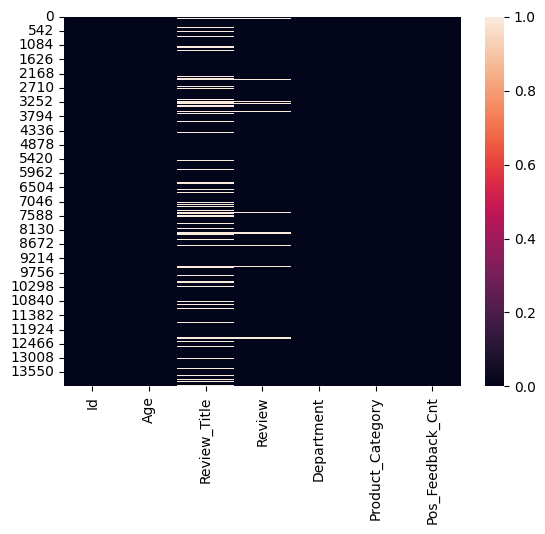

In [7]:
sns.heatmap(df.isnull())

In [8]:
print('Tổng số review:', len(df))

Tổng số review: 14091


In [9]:
# Số review theo nhãn Pos_Feedback_Cnt (đánh giá bình luận có hữu ích không)
print(df['Pos_Feedback_Cnt'].value_counts())

Pos_Feedback_Cnt
5    7907
4    3001
3    1748
2     933
1     502
Name: count, dtype: int64


In [10]:
#Độ dài mỗi review
df['Review_length'] = df['Review'].dropna().apply(len)
df[['Review_length', 'Review']].head()

,Review_length,Review
0,362.0,Love this top! the quality is magnificent and ...
1,NaN,NaN
2,106.0,"Sleeves were tight, was difficult to put on ?...."
3,376.0,I never write reviews but this clothe is so fa...
4,72.0,Love this tshirt! casual but can be clotheed u...


In [11]:
avg_length = df['Review_length'].mean()
median_length = df['Review_length'].median()
std_length = df['Review_length'].std()

In [12]:
print(f"Độ dài trung bình: {avg_length:.2f}, Trung vị: {median_length}, Độ lệch chuẩn: {std_length:.2f}")

Độ dài trung bình: 308.84, Trung vị: 301.0, Độ lệch chuẩn: 144.31


In [13]:
# Top 10 sản phẩm được phản hồi tích cực nhất
top_pos_feedback = df.sort_values("Pos_Feedback_Cnt", ascending=False)[["Review_Title", "Pos_Feedback_Cnt"]].head(10)
display(top_pos_feedback)

,Review_Title,Pos_Feedback_Cnt
15,Beautiful!,5
14089,Really versatile!,5
0,Cute fall/holiday top,5
1,NaN,5
14088,Gorgeous!,5
3,Gorgeous detailing,5
4,Cute and comfortable tee!,5
14087,"Soft, snuggly and cute",5
6,NaN,5
14049,Gorgeous,5


In [14]:
# Tạo cột Label : nhãn tốt (1) nếu Pos_Feedback_Cnt >= 10, ngược lại là 0
df["Label"] = df['Pos_Feedback_Cnt'].apply(lambda x : 1 if x >= 3 else 0)
df['Label'].head(12)

0     1
1     1
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     0
10    1
11    1
Name: Label, dtype: int64

<Axes: title={'center': 'Phan bo review tot va xau'}, ylabel='count'>

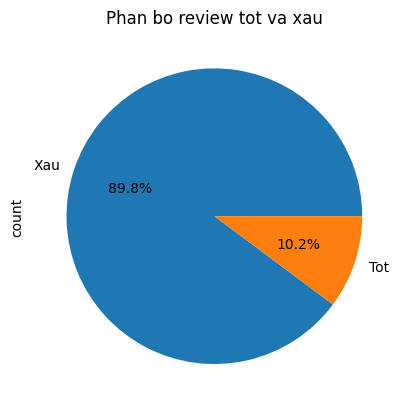

In [15]:
reviews_by_label = df["Label"].value_counts()
reviews_by_label.index = ['Xau', 'Tot']

reviews_by_label.plot(kind = 'pie', autopct = '%1.1f%%', title = 'Phan bo review tot va xau')

### Phân tích từ vựng và WordCloud

In [16]:
#lọc bỏ các review thiếu
df_reviews = df.dropna(subset = ['Review_Title', 'Review'])
df_reviews

,Id,Age,Review_Title,Review,Department,Product_Category,Pos_Feedback_Cnt,Review_length,Label
0,17274,34,Cute fall/holiday top,Love this top! the quality is magnificent and ...,Tops,Blouses,5,362.0,1
2,16479,40,Disappointed,"Sleeves were tight, was difficult to put on ?....",Tops,Blouses,2,106.0,0
3,1925,28,Gorgeous detailing,I never write reviews but this clothe is so fa...,Clothes,Clothes,5,376.0,1
4,5691,39,Cute and comfortable tee!,Love this tshirt! casual but can be clotheed u...,Tops,Knits,5,72.0,1
5,21414,45,Disappointed,I was so smitten by this shirt when i saw it o...,Tops,Knits,2,501.0,0
...,...,...,...,...,...,...,...,...,...
14084,4187,53,Sweet and comfy,I like this comfy top. i bought it to wear wit...,Tops,Knits,4,467.0,1
14086,13641,38,Too flowy,The pattern and fabric on this clothe are very...,Clothes,Clothes,3,165.0,1
14087,2245,44,"Soft, snuggly and cute","Like the previous reviewer stated, it's more l...",Tops,Sweaters,5,501.0,1
14088,16929,44,Gorgeous!,This sweater is so lovely.. i like the fact th...,Tops,Sweaters,5,404.0,1


In [17]:
#Wordcloud tổng thể
text_all = " ".join(df_reviews['Review'])

Text(0.5, 1.0, 'WordCloud toàn bộ review')

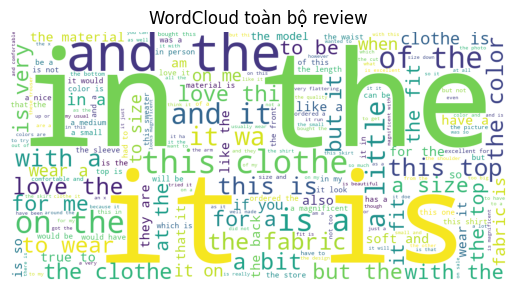

In [18]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords='english').generate(text_all)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud toàn bộ review')

### Phân tích từ khóa theo Label

In [19]:
good_review = df[df['Label'] == 1]
bad_review = df[df['Label'] == 0]

In [20]:
# review tot va xau
wc_good = WordCloud (width=800, height = 400, background_color = 'White').generate(' '.join(good_review['Review'].dropna()))
wc_bad = WordCloud (width = 800, height = 400, background_color = 'White').generate(" ".join(bad_review['Review'].dropna()))

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

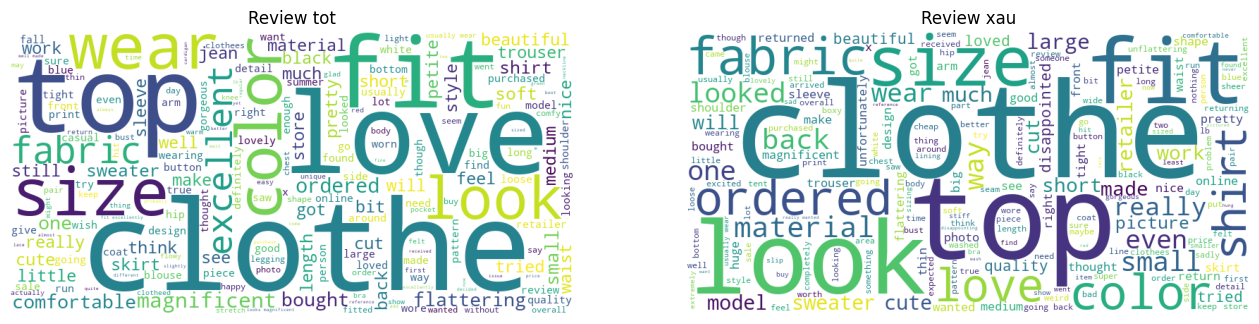

In [21]:
fig, axs = plt.subplots(1, 2, figsize = (16, 6))
axs[0].imshow(wc_good)
axs[0].set_title ('Review tot')
axs[0].axis('off')

axs[1].imshow(wc_bad)
axs[1].set_title ('Review xau')
axs[1].axis('off')

# plt.tight_layout()

### Phân tích độ dài review

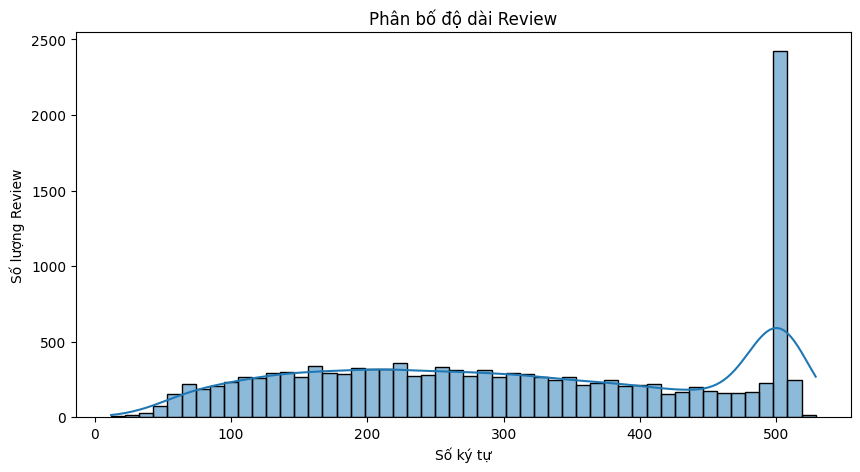

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Review_length'], bins=50, kde=True)
plt.title("Phân bố độ dài Review")
plt.xlabel("Số ký tự")
plt.ylabel("Số lượng Review")
plt.show()

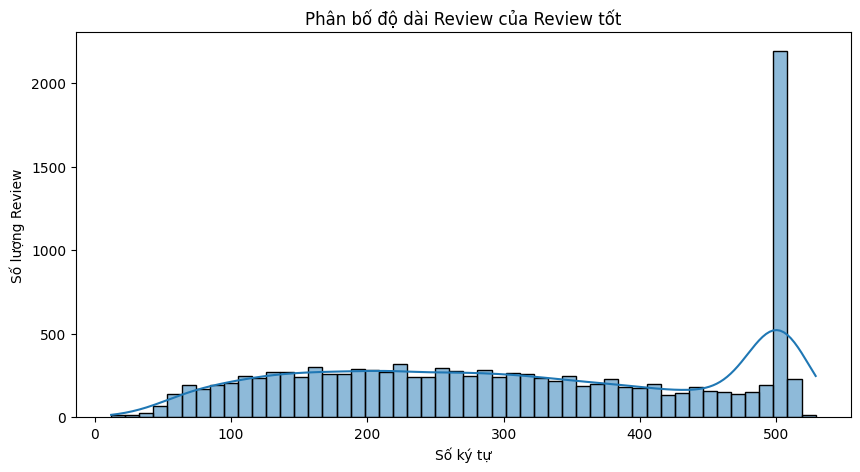

In [23]:
#review tot 
plt.figure(figsize=(10, 5))
sns.histplot(good_review['Review_length'], bins=50, kde=True)
plt.title("Phân bố độ dài Review của Review tốt")
plt.xlabel("Số ký tự")
plt.ylabel("Số lượng Review")
plt.show()

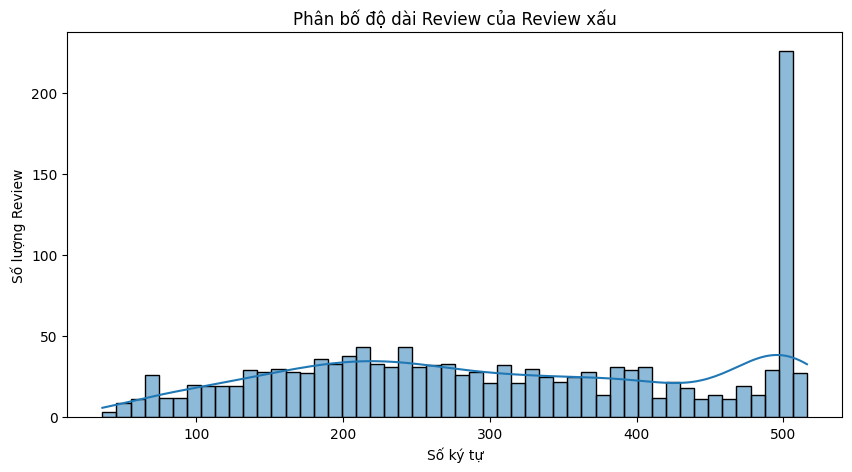

In [24]:
#review xau
plt.figure(figsize=(10, 5))
sns.histplot(bad_review['Review_length'], bins=50, kde=True)
plt.title("Phân bố độ dài Review của Review xấu")
plt.xlabel("Số ký tự")
plt.ylabel("Số lượng Review")
plt.show()

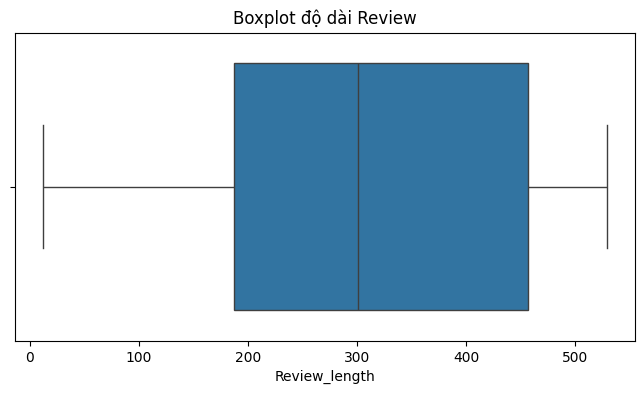

In [25]:
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Review_length'])
plt.title("Boxplot độ dài Review")
plt.show()

### Tần suất từ khóa & Bigram

In [26]:
# Lấy ra top 20 từ đơn
vectorizer = CountVectorizer(stop_words='english') 
X_counts = vectorizer.fit_transform (df_reviews['Review'].astype(str))
#.toarray() biến ma trận sparse thành mảng.
word_freq = dict(zip(vectorizer.get_feature_names_out(), X_counts.toarray().sum(axis=0))) #cong theo cot

In [27]:
# Hiển thị 20 từ phổ biến nhất
top_words = sorted(word_freq.items(), key = lambda x : x[1], reverse = True)[:20]
for k, v in top_words:
    print(f"{k}: {v}")

clothe: 5554
size: 4708
love: 4610
fit: 3966
like: 3792
wear: 3480
magnificent: 3112
just: 3057
fabric: 2517
small: 2485
color: 2415
look: 2128
really: 2088
excellent: 2085
ordered: 2050
little: 1983
flattering: 1862
soft: 1792
bought: 1624
comfortable: 1621


In [28]:
# bigram
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigrams = bigram_vectorizer.fit_transform(df_reviews['Review'].astype(str))
bigram_freq = dict(zip(bigram_vectorizer.get_feature_names_out(), X_bigrams.toarray().sum(axis=0)))
top_bigrams = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:20]
print("\nTop 20 Bigram phổ biến:")
for bigram, freq in top_bigrams:
    print(f"{bigram}: {freq}")


Top 20 Bigram phổ biến:
in the: 3740
it is: 3273
and the: 2988
this clothe: 2470
on the: 2271
of the: 2140
and it: 1958
it was: 1634
this top: 1510
this is: 1438
the fabric: 1406
love the: 1340
to wear: 1263
is very: 1233
love this: 1179
but it: 1156
the clothe: 1154
but the: 1090
for me: 1082
with the: 1070


### 3.1 Phát triển Dashboard tương tác

### Phần này chạy trong VSC

2025-05-15 11:13:19.812 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 11:13:19.819 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 11:13:20.768 
  command:

    streamlit run C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-15 11:13:20.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 11:13:20.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 11:13:20.773 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 11:13:20.778 Thread 'MainThread': missing ScriptRunContext! This wa

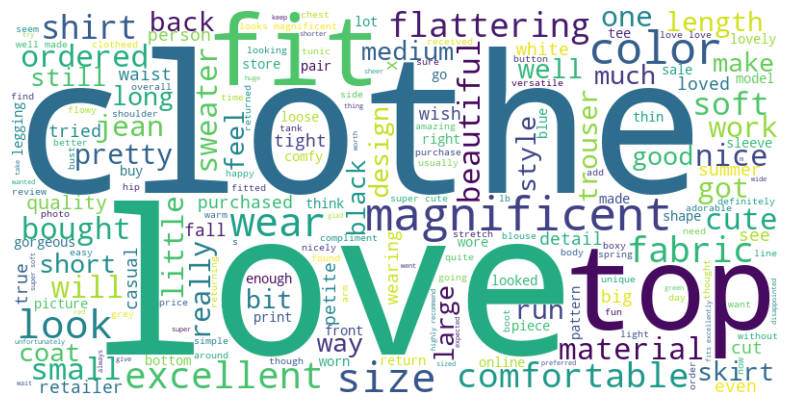

In [29]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import streamlit as st
import plotly.express as px

df = pd.read_csv("Nhóm-7-Women_Clothes_Data.csv")
df['Review_length'] = df['Review'].astype(str).apply(len)

# Tạo cột Label (giả sử phân loại review tốt nếu Pos_Feedback_Cnt >= 5, ngược lại là xấu)
df['Label'] = df['Pos_Feedback_Cnt'].apply(lambda x: 'Tốt' if x >= 5 else 'Xấu')

st.set_page_config(layout="wide")
st.title("📊 Dashboard EDA - Women Clothing Reviews")

# Sidebar filter
st.sidebar.header("🔍 Bộ lọc")
selected_label = st.sidebar.selectbox("Chọn Label:", options=df['Label'].unique())
length_range = st.sidebar.slider("Chọn độ dài review:", int(df['Review_length'].min()), int(df['Review_length'].max()), (20, 300))

# Lọc dữ liệu
df_filtered = df[(df['Label'] == selected_label) & (df['Review_length'].between(*length_range))]

# Tabs layout
tabs = st.tabs(["📈 Tổng quan", "☁️ WordCloud", "🧠 Từ khóa", "📊 So sánh mô hình"])

with tabs[0]:
    st.subheader("Tổng quan dữ liệu")
    col1, col2 = st.columns(2)
    with col1:
        st.metric("Số lượng review", df_filtered.shape[0])
        fig_len = px.histogram(df_filtered, x='Review_length', nbins=40, title="Phân bố độ dài review")
        st.plotly_chart(fig_len, use_container_width=True)
    with col2:
        label_count = df['Label'].value_counts()
        fig_pie = px.pie(values=label_count.values, names=label_count.index, title="Tỉ lệ các Label")
        st.plotly_chart(fig_pie, use_container_width=True)

with tabs[1]:
    st.subheader("WordCloud theo Label đã chọn")
    wc_text = " ".join(df_filtered['Review'].dropna().astype(str).values)
    wc = WordCloud(width=800, height=400, background_color='white').generate(wc_text)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    st.pyplot(fig)

with tabs[2]:
    st.subheader("Từ khóa phổ biến")
    vectorizer = CountVectorizer(stop_words='english', max_features=30)
    X = vectorizer.fit_transform(df_filtered['Review'].dropna().astype(str))
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    keyword_df = pd.DataFrame(word_freq.items(), columns=['Từ khóa', 'Tần suất']).sort_values(by='Tần suất', ascending=False)
    st.dataframe(keyword_df)

with tabs[3]:
    st.subheader("So sánh mô hình (Placeholder)")
    st.info("Có thể thêm biểu đồ Confusion Matrix, ROC Curve ở đây.")